In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

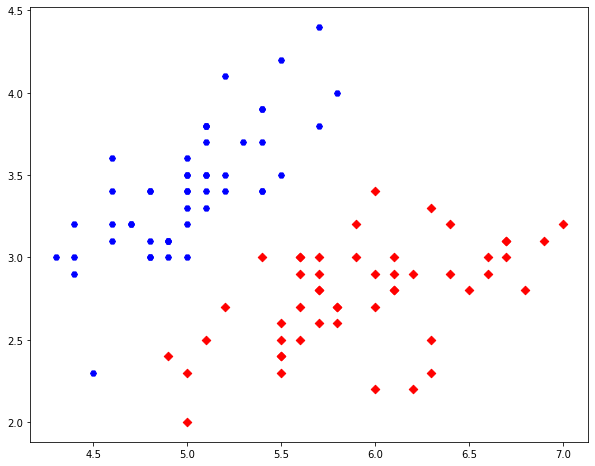

In [21]:
x = df['SepalLengthCm']
y = df['SepalWidthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
plt.show()

In [22]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

## Drop the other two features and extract the target values

df = df.drop(['PetalLengthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

## Shuffle and split the data into training and testing set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

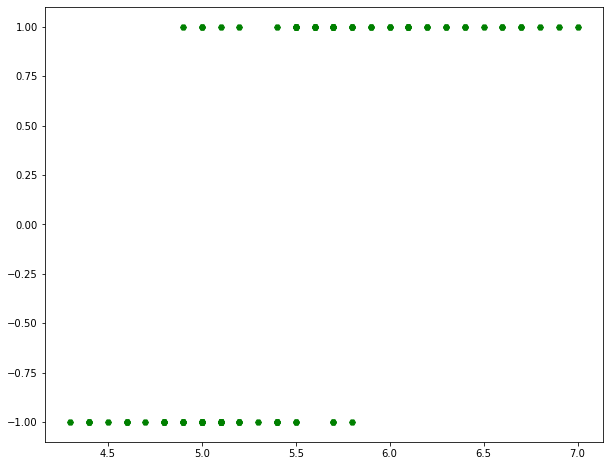

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(x_train[:,0], y_train, marker = 'H', color='Green')
plt.show()

In [24]:
# start the gradient descent

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f0 = np.ones((90,1))
train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))
w0 = np.zeros((90,1))

epochs = 1
alpha = 0.01

while (epochs < 30000):
    y = w1 * train_f1 + w2 * train_f2 - w0
    prod = y * y_train
 #   print(epochs)
    count = 0
    for val in prod:    
        if (val >= 1):
            cost = 0
            w0 = w0
            w1 = w1 - alpha * ( 1/epochs * w1)
            w2 = w2 - alpha * ( 1/epochs * w2)
        else:
            cost = 1 - val
            w0 = w0 - alpha * (train_f0[count] * y_train[count])
            w1 = w1 - alpha * (1/epochs * w1 - train_f1[count] * y_train[count])
            w2 = w2 - alpha * (1/epochs * w2 - train_f2[count] * y_train[count])
        count += 1
    epochs += 1

print(prod.shape)
print(prod)

(90, 1)
[[ 3.66719584]
 [ 1.88145349]
 [ 9.82339413]
 [ 4.88478534]
 [ 5.02044361]
 [ 4.45229076]
 [ 9.72574241]
 [ 7.489748  ]
 [ 4.29499386]
 [ 5.80553853]
 [ 3.19669472]
 [ 5.02044361]
 [ 4.29499386]
 [ 5.84354507]
 [ 6.17838793]
 [ 3.33235298]
 [ 6.17838793]
 [ 5.60635393]
 [ 5.84354507]
 [10.39542813]
 [ 3.23470126]
 [ 1.49084661]
 [ 4.62983673]
 [ 1.11411605]
 [ 2.51313267]
 [ 6.17838793]
 [ 5.80553853]
 [ 3.13704954]
 [ 5.70788681]
 [ 8.90264095]
 [ 3.03939782]
 [ 3.09904299]
 [ 3.23470126]
 [ 1.49084661]
 [ 1.45284006]
 [ 4.6475942 ]
 [ 1.98298637]
 [12.43223795]
 [ 3.82449274]
 [ 3.23470126]
 [ 5.78778105]
 [ 2.35583577]
 [11.37194534]
 [ 8.55004061]
 [ 7.29444456]
 [ 7.33633226]
 [11.94397934]
 [ 6.9596017 ]
 [ 5.59247761]
 [ 6.09849369]
 [ 5.64824163]
 [ 1.1598849 ]
 [ 1.82568947]
 [ 5.61023509]
 [ 6.23415196]
 [ 6.14038139]
 [ 4.25698732]
 [ 6.43333655]
 [10.35354044]
 [ 5.51258337]
 [10.25588871]
 [ 6.72629172]
 [ 3.39199816]
 [11.27429362]
 [ 7.35408974]
 [ 5.41105049]
 [

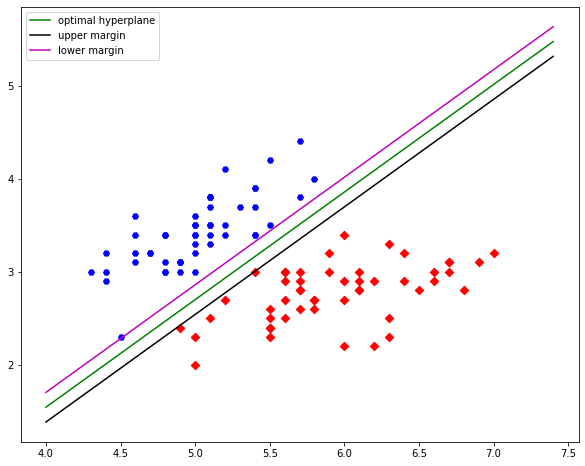

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(setosa_x, setosa_y, marker='H', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='D', color='red')
x = np.arange(4,7.5,0.1)
y = -(w1[-1]/w2[-1])*x + w0[-1]/w2[-1]
y1 = -(w1[-1]/w2[-1])*x + (1 + w0[-1])/w2[-1]
y2 = -(w1[-1]/w2[-1])*x + (-1 + w0[-1])/w2[-1]
plt.plot(x,y,label='optimal hyperplane', color = 'Green')
plt.plot(x,y1,label='upper margin', color = 'k')
plt.plot(x,y2,label='lower margin', color = 'm')
plt.legend()
plt.show()